<a href="https://colab.research.google.com/github/KathituCodes/NASA-API-Explorer/blob/main/NASA_API_Explorer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Aim**
In this checkpoint, we are going to practice consuming public APIs through the NASA public APIs portal.

Portal description : The objective of this portal is to make NASA data, including imagery, eminently accessible to application developers and data professionals.

**Instructions**
1. Go to the NASA API portal and generate the API KEY
2. Import the requests package and store API KEY in variable
3. Go back to portal website and click on 'browse APIs'
4. Click on the first dropdown menu, named 'APOD' and read its documentation
5. Follow the provided documentation to ask the API endpoint for the astronomy picture of the day. Get then display the image on the notebook.
6. Go through the list of the provided API endpoints once again and select 'Astronomy Picture of the Day' option. Store the results in a pandas dataframe
7. Do the necessary data pre-processing tasks on the previous result in order to get a clean dataframe with the following columns :
  - `Asteroid ID`
  - `Asteroid name`
  - `The Minimal estimated diameter in Kilometre`
  - `Absolute_magnitude`
  - `Relative_velocity(km/s)`
8. Try to export the new dataframe into a CSV file and share it with colleagues


# 1. **Generate API Key & Import Requests Package Then Store the API Key**

In [ ]:
import requests
import pandas as pd
from datetime import datetime, timedelta
from IPython.display import display, HTML

# Store your API Key
api_key = 'IQAXySDQK7ANsnKDUFru8aPn63wA56tZvrCcHCx5'

# 2. **Define functions to fetch and process asteroid data**
Next, we'll use the APOD API to request the Astronomy Picture of the Day and display the image. In this step, we define three crucial functions for working with the NASA Near Earth Object Web Service (NeoWs) API.

In [ ]:
def fetch_asteroid_data(start_date, end_date):
    neows_url = 'https://api.nasa.gov/neo/rest/v1/feed'
    params = {
        'start_date': start_date,
        'end_date': end_date,
        'api_key': api_key
    }
    response = requests.get(neows_url, params=params)
    response.raise_for_status()  # Raise an exception for bad responses
    return response.json()

def process_asteroid_data(data):
    all_asteroids = []
    for date, asteroids in data['near_earth_objects'].items():
        for asteroid in asteroids:
            asteroid_data = {
                'Asteroid ID': asteroid['id'],
                'Asteroid Name': asteroid['name'],
                'Minimal Estimated Diameter (km)': asteroid['estimated_diameter']['kilometers']['estimated_diameter_min'],
                'Absolute Magnitude': asteroid['absolute_magnitude_h'],
                'Relative Velocity (km/s)': float(asteroid['close_approach_data'][0]['relative_velocity']['kilometers_per_second']),
                'Close Approach Date': asteroid['close_approach_data'][0]['close_approach_date']
            }
            all_asteroids.append(asteroid_data)

    df = pd.DataFrame(all_asteroids)

    # Ensure correct data types
    df['Minimal Estimated Diameter (km)'] = df['Minimal Estimated Diameter (km)'].astype(float)
    df['Absolute Magnitude'] = df['Absolute Magnitude'].astype(float)
    df['Relative Velocity (km/s)'] = df['Relative Velocity (km/s)'].astype(float)

    return df

def display_asteroid_data(df):
    # Style the DataFrame
    styled_df = df.style.set_properties(**{'text-align': 'center'})
    styled_df = styled_df.format({
        'Minimal Estimated Diameter (km)': '{:.4f}',
        'Absolute Magnitude': '{:.2f}',
        'Relative Velocity (km/s)': '{:.2f}'
    })

    # Display the styled DataFrame
    display(HTML("<h2>Near Earth Objects (Asteroids)</h2>"))
    display(styled_df)

    # Display summary information
    total_asteroids = len(df)
    avg_diameter = df['Minimal Estimated Diameter (km)'].mean()
    avg_velocity = df['Relative Velocity (km/s)'].mean()

    summary_html = f"""
    <h3>Summary Statistics:</h3>
    <ul>
        <li>Total Asteroids: {total_asteroids}</li>
        <li>Average Minimal Diameter: {avg_diameter:.4f} km</li>
        <li>Average Relative Velocity: {avg_velocity:.2f} km/s</li>
    </ul>
    """
    display(HTML(summary_html))


These functions form the core of our asteroid data analysis pipeline, allowing us to fetch, process, and visualize data efficiently.

1. `fetch_asteroid_data(start_date, end_date)`:
   - Sends a request to the NASA NeoWs API
   - Retrieves asteroid data for the specified date range
   - Handles potential errors in the API response

2. `process_asteroid_data(data)`:
   - Extracts relevant information from the API response
   - Creates a pandas DataFrame with key asteroid attributes
   - Includes: ID, Name, Minimal Estimated Diameter, Absolute Magnitude, Relative Velocity, and Close Approach Date

3. `display_asteroid_data(df)`:
   - Utilizes IPython.display for enhanced visualization
   - Presents the asteroid data in a styled table
   - Provides summary statistics (total asteroids, average diameter, average velocity)

# 3. **Fetch, Process, and Display Asteroid Data**

In this final step, we put our defined functions to use.
1. Date Range Setting:
   - We set the start date to today
   - The end date is set to 7 days from now
   - This provides a week-long window of near-earth asteroid activity

2. Data Retrieval and Processing:
   - We call `fetch_asteroid_data()` to get the raw data from the NASA API
   - The raw data is then processed using `process_asteroid_data()` to create a structured DataFrame

3. Data Visualization:
   - We use our custom `display_asteroid_data()` function to create an interactive and visually appealing representation of the asteroid data
   - This includes a styled table of asteroid information and summary statistics

4. Data Persistence:
   - The processed data is saved to a CSV file named 'asteroid_data.csv'
   - This allows for easy sharing and further analysis outside of this notebook

In [ ]:
# Set date range for the next 7 days
start_date = datetime.now().strftime('%Y-%m-%d')
end_date = (datetime.now() + timedelta(days=7)).strftime('%Y-%m-%d')

# Fetch and process data
data = fetch_asteroid_data(start_date, end_date)
df = process_asteroid_data(data)

# Display results using IPython
display_asteroid_data(df)


,Asteroid ID,Asteroid Name,Minimal Estimated Diameter (km),Absolute Magnitude,Relative Velocity (km/s),Close Approach Date
0,3304382,(2005 WR2),0.3316,19.52,14.64,2024-09-10
1,3426807,(2008 RQ24),0.1839,20.80,3.62,2024-09-10
2,3616348,(2012 VH5),0.0844,22.49,7.87,2024-09-10
3,3648844,(2013 TR4),0.0598,23.24,9.19,2024-09-10
4,3826885,(2018 QR),0.0305,24.70,10.73,2024-09-10
5,54016590,(2020 HP1),0.0051,28.60,9.73,2024-09-10
6,54053850,(2020 PM7),0.0917,22.31,10.37,2024-09-10
7,54194978,(2021 RU7),0.0538,23.47,11.66,2024-09-10
8,54239834,(2022 BA1),0.0810,22.58,24.95,2024-09-10
9,54293318,(2020 CO8),0.0067,28.00,9.04,2024-09-10


# 4. **Plot Visualization**
The below visualization would provide a quick overview of how asteroid diameters relate to their velocities.

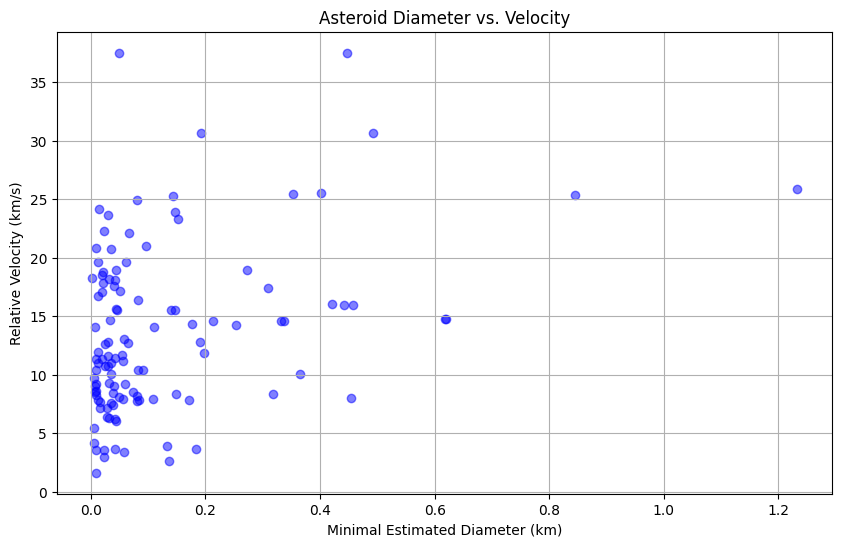

In [ ]:
import matplotlib.pyplot as plt

def plot_asteroid_data(df):
    plt.figure(figsize=(10, 6))
    plt.scatter(df['Minimal Estimated Diameter (km)'], df['Relative Velocity (km/s)'], c='blue', alpha=0.5)
    plt.title('Asteroid Diameter vs. Velocity')
    plt.xlabel('Minimal Estimated Diameter (km)')
    plt.ylabel('Relative Velocity (km/s)')
    plt.grid(True)
    plt.show()

# Call the plot function
plot_asteroid_data(df)

# 5. **Store the results in a pandas DataFrame**
 We need to store data related to asteroids. S we'll need to modify the APOD API request to retrieve this data. Lets use the "NeoWs" (Near Earth Object Web Service) API.

In [ ]:
import pandas as pd

# Define the NeoWs endpoint
neows_url = 'https://api.nasa.gov/neo/rest/v1/feed'

# Define the parameters
params = {
    'start_date': '2024-09-01',
    'end_date': '2024-09-01',
    'api_key': api_key
}

# Make the API request
response = requests.get(neows_url, params=params)
data = response.json()

# Extract relevant data into a DataFrame
asteroids = data['near_earth_objects']['2024-09-01']
df = pd.DataFrame(asteroids, columns=['id', 'name', 'estimated_diameter', 'absolute_magnitude_h', 'close_approach_data'])

# Data Pre-processing to get the required columns
df['min_diameter_km'] = df['estimated_diameter'].apply(lambda x: x['kilometers']['estimated_diameter_min'])

# Handling cases where close_approach_data might be empty
df['relative_velocity_km_s'] = df['close_approach_data'].apply(lambda x: x[0]['relative_velocity']['kilometers_per_second'] if x else None)

# Select required columns
df_cleaned = df[['id', 'name', 'min_diameter_km', 'absolute_magnitude_h', 'relative_velocity_km_s']]
df_cleaned.columns = ['Asteroid ID', 'Asteroid Name', 'Minimal Estimated Diameter (km)', 'Absolute Magnitude', 'Relative Velocity (km/s)']

# Display the cleaned DataFrame
df_cleaned.head()

,Asteroid ID,Asteroid Name,Minimal Estimated Diameter (km),Absolute Magnitude,Relative Velocity (km/s)
0,3634786,(2013 GX79),0.185590,20.78,17.5664583805
1,3672909,(2014 KS76),0.012605,26.62,18.3711582792
2,3719473,(2015 KB19),0.110295,21.91,11.7314245786
3,3781020,(2017 QO17),0.076658,22.70,19.9519920423
4,54051298,(2020 QD3),0.015295,26.20,16.749015407


# 4. **Export the DataFrame to a CSV file**
Finally, we'll export the cleaned DataFrame to a CSV file

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from IPython.display import display, HTML

# Define the path to save the file
file_path = '/content/drive/MyDrive/Colab Notebooks/asteroid_data.csv'

# Export DataFrame to CSV in Google Drive
df_cleaned.to_csv(file_path, index=False)

# Display confirmation using IPython.display
display(HTML(f"<p style='color:yellow;'>Data successfully exported to <strong>{file_path}</strong></p>"))